<a href="https://colab.research.google.com/github/singjc/diffusion-deconvolution-dia-msms/blob/main/nbs/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install pyopenms-viz
import numpy as np
import pandas as pd

from bokeh.io import output_notebook
output_notebook();

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 2.2 MB/s eta 0:00:00


In [5]:
# prompt: Load numpy array files from my google drive account

from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir("drive/MyDrive/2024-07-diffusionDeconvolution")

# Replace 'path/to/your/numpy/array.npy' with the actual path to your file
numpy_array = np.load('drive/MyDrive/2024-07-diffusionDeconvolution/ms1_data.npy')

# Now you can work with the loaded numpy array
print(numpy_array)
print(type(numpy_array))


Mounted at /content/drive
[[ 60155  67805  76833 ... 519013 496818 471598]
 [447486 443025 456083 ... 676678 659637 630837]
 [579766 521108 493974 ...  62572  68519  76189]
 ...
 [608442 558996 613774 ... 164885 198358 217562]
 [204876 207198 191876 ... 210218 270771 197900]
 [319798 353684 377791 ... 257145 182333 254232]]
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/pyopenms_viz/_matplotlib/core.py:102: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(self.grid, zorder=0)


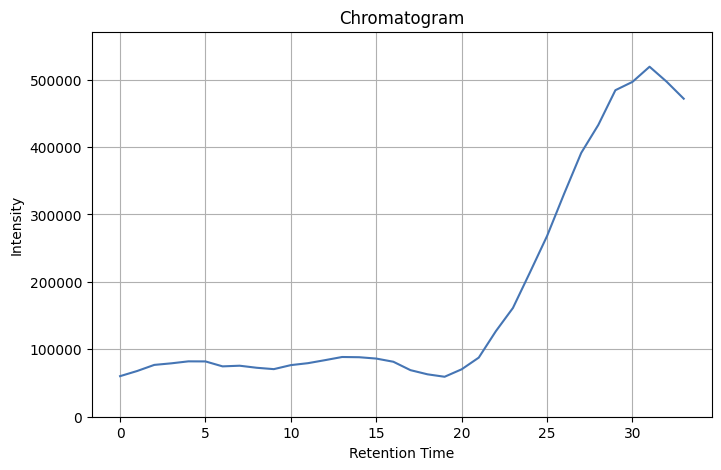

In [6]:
pd.DataFrame(numpy_array[0]).reset_index().rename(columns={0: 'intensity'})\
.plot(x='index',
      y='intensity',
      kind='chromatogram',
      height=500, width=800,
      grid=False, show_plot=True)

/usr/local/lib/python3.10/dist-packages/pyopenms_viz/_matplotlib/core.py:102: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



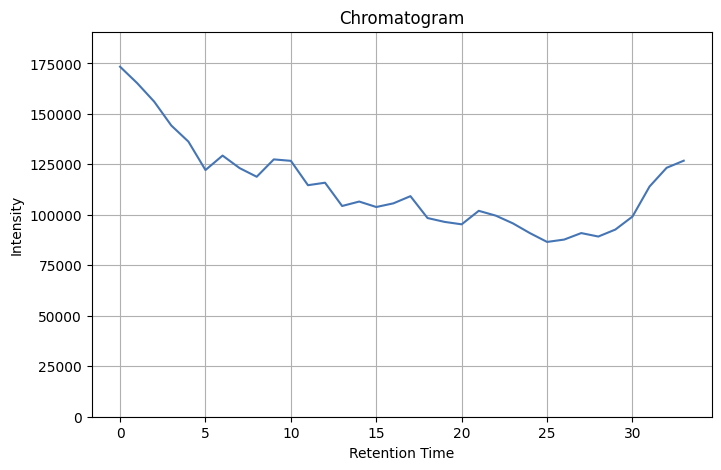

In [ ]:
pd.DataFrame(numpy_array[500]).reset_index().rename(columns={0: 'intensity'})\
.plot(x='index',
      y='intensity',
      kind='chromatogram',
      height=500, width=800,
      grid=False, show_plot=True)

In [7]:
ms2_d = np.load('drive/MyDrive/2024-07-diffusionDeconvolution/ms2_data_int32.npy')

In [26]:
# Assuming ms2_d[0] is your 2D array
array_2d = ms2_d[0]

for i in range(1, 16):
    array_2d += ms2_d[i*520]

# array_2d_2 = ms2_d[500]
# for i in range(1, 16):
#     array_2d_2 += ms2_d[500+i*520]

# array_2d = (array_2d*0.5) + (array_2d_2*0.75)

# Get the dimensions of the array
rows, cols = array_2d.shape

# Create meshgrid for x and y coordinates
y, x = np.meshgrid(range(rows), range(cols), indexing='ij')

# Flatten the arrays
x_flat = x.flatten()
y_flat = y.flatten()
intensity_flat = array_2d.flatten()

# Create a dataframe
df = pd.DataFrame({
    'x': x_flat,
    'y': y_flat,
    'intensity': intensity_flat
})
df

,x,y,intensity
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,790
4,4,0,0
...,...,...,...
84995,2495,33,60
84996,2496,33,0
84997,2497,33,0
84998,2498,33,0


In [ ]:
# prompt: Get the size in megabytes of a numpy array

def get_array_size_mb(array):
  """Calculates the size of a NumPy array in megabytes.

  Args:
    array: The NumPy array.

  Returns:
    The size of the array in megabytes.
  """
  num_bytes = array.nbytes
  size_mb = num_bytes / (1024 * 1024)
  return size_mb

# Example usage:
array_size_mb = get_array_size_mb(numpy_array)
print(f"The size of the NumPy array is: {array_size_mb:.2f} MB")


The size of the numpy_array is: 5.19 MB


In [27]:
df.apply(
        lambda x: x.fillna(0) if x.dtype.kind in "biufc" else x.fillna(".")
    ) \
    .groupby('y')['intensity'] \
    .sum() \
    .reset_index() \
.plot(x='y', y= 'intensity',
      kind='chromatogram', xlabel="X Index", ylabel="Y Index",
      height=500, width=800, #plot_3d=True,
      grid=False, show_plot=True, backend="ms_plotly")

In [ ]:
# os.listdir("drive/MyDrive/2024-07-diffusionDeconvolution/ms2_spectra_metadata.tsv")
ms1_meta = pd.read_csv("drive/MyDrive/2024-07-diffusionDeconvolution/ms1_metadata.tsv", sep="\t")
ms2_meta = pd.read_csv("drive/MyDrive/2024-07-diffusionDeconvolution/ms2_spectra_metadata.tsv", sep="\t")
print(ms1_meta)
ms2_meta

     mzStart  mzEnd  rtStart  rtEnd
0        640    645     2000   2050
1        640    645     2050   2100
2        640    645     2100   2150
3        640    645     2150   2200
4        640    645     2200   2250
..       ...    ...      ...    ...
515      699    704     3750   3800
516      699    704     3800   3850
517      699    704     3850   3900
518      699    704     3900   3950
519      699    704     3950   4000

[520 rows x 4 columns]


,ms2_mzStart,ms2_mzEnd,rtStart,rtEnd,mzStart,mzEnd
0,400,425,2000,2050,640,645
1,400,425,2050,2100,640,645
2,400,425,2100,2150,640,645
3,400,425,2150,2200,640,645
4,400,425,2200,2250,640,645
...,...,...,...,...,...,...
8315,775,800,3750,3800,699,704
8316,775,800,3800,3850,699,704
8317,775,800,3850,3900,699,704
8318,775,800,3900,3950,699,704


In [ ]:
ms1_meta.loc[ms1_meta.mzStart==640][['mzStart', 'mzEnd']].drop_duplicates()

,mzStart,mzEnd
0,640,645


In [ ]:
ms2_meta.loc[ms2_meta.mzStart==640][['ms2_mzStart','ms2_mzEnd', 'mzStart', 'mzEnd']].drop_duplicates()

,ms2_mzStart,ms2_mzEnd,mzStart,mzEnd
0,400,425,640,645
520,425,450,640,645
1040,450,475,640,645
1560,475,500,640,645
2080,500,525,640,645
2600,525,550,640,645
3120,550,575,640,645
3640,575,600,640,645
4160,600,625,640,645
4680,625,650,640,645


In [25]:
# Initialize the master array with the correct shape
master_array = np.zeros((520, 34, 2500), dtype=int)

# Loop through the 520 groups
for group in range(520):
    array_2d_2 = np.zeros((34, 2500), dtype=int)

    # Sum 16 arrays for each group
    for i in range(16):
        k = i * 520 + group  # Index for each array in the group
        array_2d_2 += ms2_d[k]

    # Add the group sum to the master array
    master_array[group] = array_2d_2
master_array.shape

(520, 34, 2500)

In [33]:
tmp_arr = master_array[0]

In [37]:
# Get the dimensions of the array
rows, cols = tmp_arr.shape

# Create meshgrid for x and y coordinates
y, x = np.meshgrid(range(rows), range(cols), indexing='ij')

# Flatten the arrays
x_flat = x.flatten()
y_flat = y.flatten()
intensity_flat = array_2d.flatten()

# Create a dataframe
df = pd.DataFrame({
    'x': x_flat,
    'y': y_flat,
    'intensity': intensity_flat
})
df

,x,y,intensity
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,790
4,4,0,0
...,...,...,...
84995,2495,33,60
84996,2496,33,0
84997,2497,33,0
84998,2498,33,0


In [38]:
df.apply(
        lambda x: x.fillna(0) if x.dtype.kind in "biufc" else x.fillna(".")
    ) \
    .groupby('y')['intensity'] \
    .sum() \
    .reset_index() \
.plot(x='y', y= 'intensity',
      kind='chromatogram', xlabel="X Index", ylabel="Y Index",
      height=500, width=800, #plot_3d=True,
      grid=False, show_plot=True, backend="ms_plotly")

In [42]:
df\
.plot(x='y', y= 'intensity', by="x",
      kind='chromatogram', xlabel="X Index", ylabel="Y Index",
      height=500, width=800, #plot_3d=True,
      grid=False, show_plot=True, backend="ms_plotly")

In [43]:
df\
.plot(x='y', y='x', z='intensity',
      kind='peakmap', xlabel="X Index", ylabel="Y Index",
      height=500, width=800, #plot_3d=True,
      grid=False, show_plot=True, backend="ms_plotly")

In [39]:
# prompt: write out this numpy arrray to np

np.save('drive/MyDrive/2024-07-diffusionDeconvolution/ms2_data_cat.npy', master_array)


In [40]:
# prompt: Convert numpy array to 32int and save to npy file

master_array_32 = master_array.astype(np.int32)
np.save('drive/MyDrive/2024-07-diffusionDeconvolution/ms2_data_cat_int32.npy', master_array_32)
